In [1]:
from PyHa.statistics import *
from PyHa.IsoAutio import *
from PyHa.visualizations import *
from PyHa.annotation_post_processing import *
import pandas as pd

## Running Moment to Moment Labeling System on a Directory of WAV Files 

In [2]:
path = "./TEST/"

### Dictionary that defines the isolation technique and parameters used to generate automated labels 

In [3]:
# Example parameters for BirdNET
#isolation_parameters = {
#    "model" : "birdnet",
#    "output_path" : "outputs",
#    "lat" : 35.4244,
#    "lon" : -120.7463,
#    "week" : 18,
#    "min_conf" : 0.1,
#    "filetype" : "wav", 
#    "num_predictions" : 1,
#    "write_to_csv" : False
#}

# Example Parameters for Microfaune
#isolation_parameters = {
#     "model" :          "microfaune",
#     "technique" :       "steinberg",
#     "threshold_type" :  "median",
#     "threshold_const" : 2.0,
#     "threshold_min" :   0.0,
#     "window_size" :     2.0,
#     "chunk_size" :      5.0,
#     "verbose"     :     True
#}

# Example parameters for TweetyNET
#isolation_parameters = {
#     "model" : "tweetynet",
#     "tweety_output": True,
#    "technique" : "steinberg",
#     "threshold_type" : "median",
#     "threshold_const" : 2.0,
#     "threshold_min" : 0.0,
#     "window_size" : 2.0,
#     "chunk_size" : 5.0
#}

isolation_parameters = {
    "model" : "fg_bg_dsp_sep",
    "technique" : "simple",
    "threshold_type" : "pure",
    "threshold_const" : 0.5,
    "verbose" : True,
    "kernel_size" : 4,
    "power_threshold" : 3.0,
    "threshold_min" : 0.0
}

### Pandas Ouput of Automated Labeling 

In [4]:
automated_df = generate_automated_labels(path,isolation_parameters);

### Function that gathers statistics about the duration of annotations

In [5]:
annotation_duration_statistics(automated_df)

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,1195,0.03,0.150662,0.315067,0.028798,0.031678,0.051837,0.106553,2.934535


### Function that converts annotations into 3 second chunks

In [6]:
annotation_chunker(automated_df, 3)

,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID
0,ScreamingPiha7.wav,133.590204,0,0.0,3.0,44100,bird
1,ScreamingPiha7.wav,133.590204,0,3.0,3.0,44100,bird
2,ScreamingPiha7.wav,133.590204,0,6.0,3.0,44100,bird
3,ScreamingPiha7.wav,133.590204,0,9.0,3.0,44100,bird
4,ScreamingPiha7.wav,133.590204,0,12.0,3.0,44100,bird
...,...,...,...,...,...,...,...
172,ScreamingPiha9.wav,37.302857,0,27.0,3.0,44100,bird
173,ScreamingPiha9.wav,37.302857,0,30.0,3.0,44100,bird
174,ScreamingPiha9.wav,37.302857,0,33.0,3.0,44100,bird
175,ScreamingPiha3.wav,6.844082,0,0.0,3.0,44100,bird


### Human Manual Labels for Comparison 

In [7]:
manual_df = pd.read_csv("ScreamingPiha_Manual_Labels.csv")
#manual_df = pd.read_csv("BirdCLEF2020_Validation.csv")
manual_df

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID
0,./TEST/,ScreamingPiha1.wav,32.6160,0,1.5448,2.1297,16000,bird
1,./TEST/,ScreamingPiha1.wav,32.6160,0,10.1638,0.8498,16000,bird
2,./TEST/,ScreamingPiha1.wav,32.6160,0,0.5549,0.9999,16000,bird
3,./TEST/,ScreamingPiha1.wav,32.6160,0,8.7739,0.8399,16000,bird
4,./TEST/,ScreamingPiha1.wav,32.6160,0,12.6335,1.9997,16000,bird
...,...,...,...,...,...,...,...,...
249,./TEST/,ScreamingPiha2.wav,33.9331,0,26.9274,1.7602,44100,bird
250,./TEST/,ScreamingPiha2.wav,33.9331,0,30.8178,0.7200,44100,bird
251,./TEST/,ScreamingPiha2.wav,33.9331,0,29.8677,0.9401,44100,bird
252,./TEST/,ScreamingPiha2.wav,33.9331,0,31.5378,1.9502,44100,bird


In [8]:
annotation_duration_statistics(manual_df)

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,254,1.87,1.068224,0.664488,0.11,0.532475,0.78005,1.767475,3.1199


### Histogram Visualization of Annotation Lengths

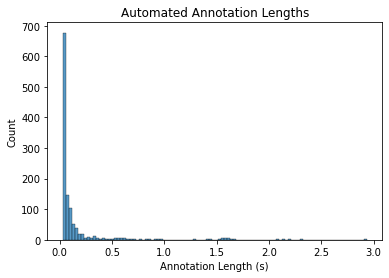

In [9]:
annotation_duration_histogram(automated_df, n_bins = 100, title = "Automated Annotation Lengths")

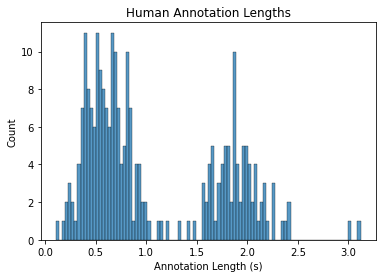

In [10]:
annotation_duration_histogram(manual_df, n_bins = 100, title = "Human Annotation Lengths")
# In the Screaming Piha clips we can see two distinct clusters based on the "Whoa" vocalizations (.25-1.25s)
# and the "Pee-Haw" vocalizations (1.25-2.5s)

### Helper function to convert to kaleidoscope-compatible format 

In [11]:
kaleidoscope_conversion(manual_df)

,FOLDER,IN FILE,CHANNEL,OFFSET,DURATION,MANUAL ID
0,./TEST,ScreamingPiha1.wav,0,1.5448,2.1297,bird
1,./TEST,ScreamingPiha1.wav,0,10.1638,0.8498,bird
2,./TEST,ScreamingPiha1.wav,0,0.5549,0.9999,bird
3,./TEST,ScreamingPiha1.wav,0,8.7739,0.8399,bird
4,./TEST,ScreamingPiha1.wav,0,12.6335,1.9997,bird
...,...,...,...,...,...,...
249,./TEST,ScreamingPiha2.wav,0,26.9274,1.7602,bird
250,./TEST,ScreamingPiha2.wav,0,30.8178,0.7200,bird
251,./TEST,ScreamingPiha2.wav,0,29.8677,0.9401,bird
252,./TEST,ScreamingPiha2.wav,0,31.5378,1.9502,bird


## Different Combinations of Spectrogram and Local Score Visualization Graphs
Note: Not all models support local score arrays.

### Baseline Graph without any annotations

No handles with labels found to put in legend.


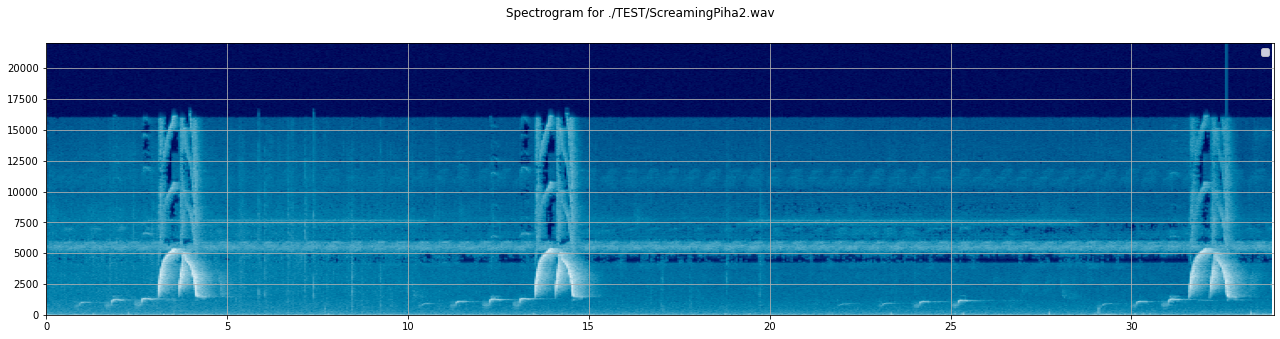

In [12]:
clip_path = "./TEST/ScreamingPiha2.wav"
spectrogram_visualization(clip_path)

### Baseline graph with log scale
Note: if the foreground-background dsp separation technique is used, the indicator vector is binary, so the log scale will look off

No handles with labels found to put in legend.


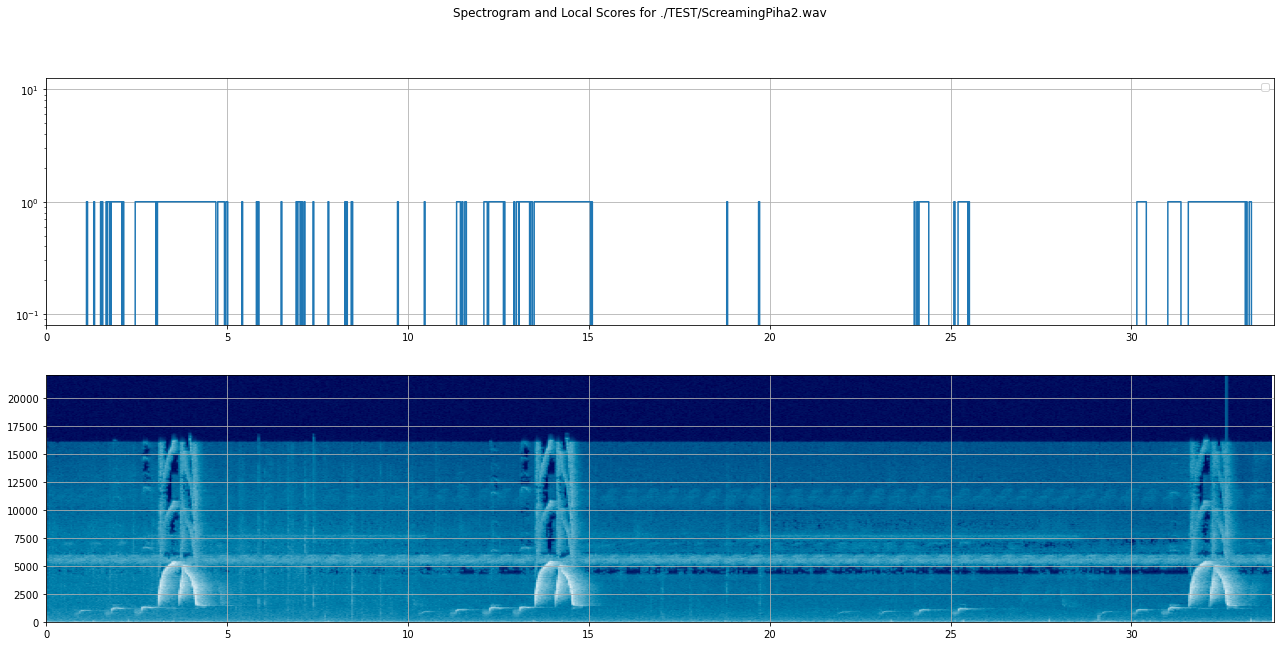

In [13]:
spectrogram_visualization(clip_path, isolation_parameters = isolation_parameters, log_scale = True)

### Baseline graph with normalized local score values between [0,1] 

No handles with labels found to put in legend.


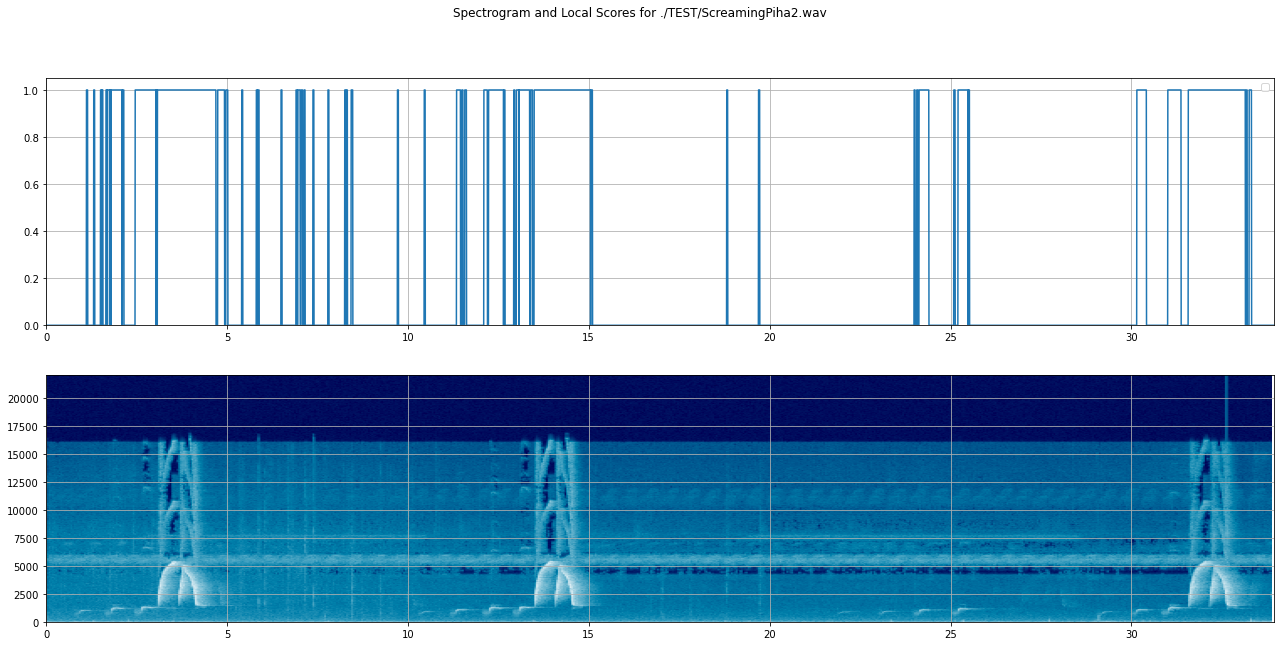

In [14]:
spectrogram_visualization(clip_path, isolation_parameters = isolation_parameters, normalize_local_scores = True)

### Graph with Automated Labeling 

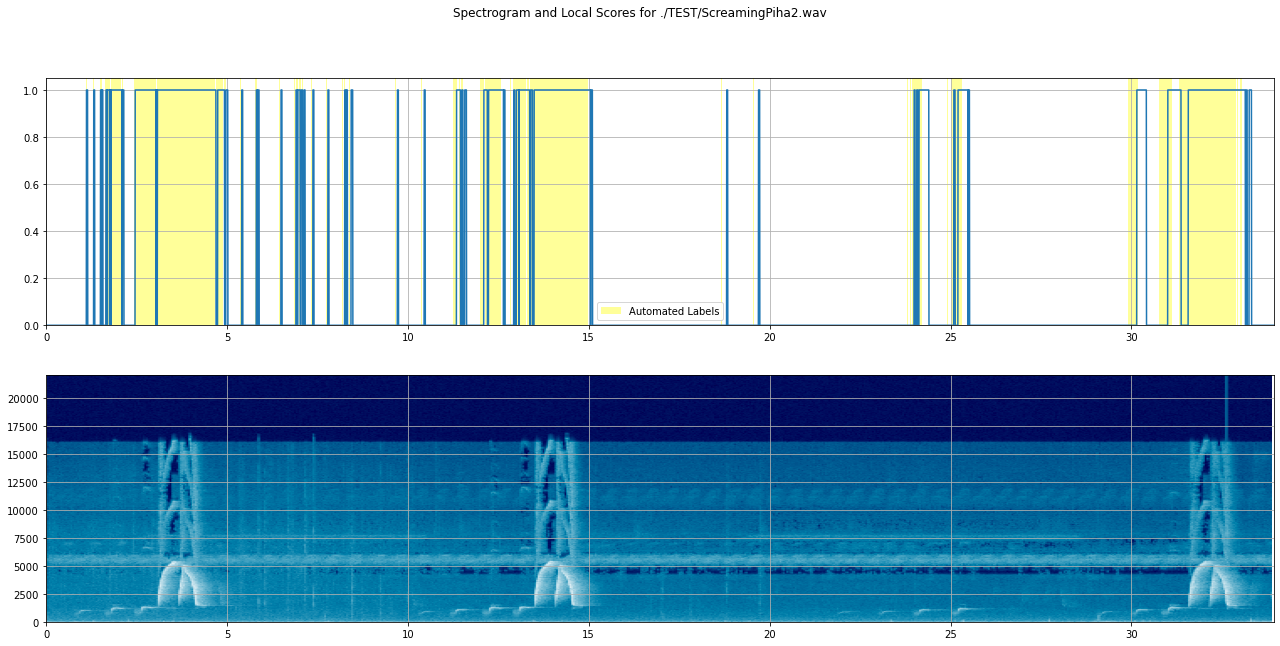

In [15]:
spectrogram_visualization(clip_path,build_automated_df = True, isolation_parameters = isolation_parameters)

### Graph with Human Labelling

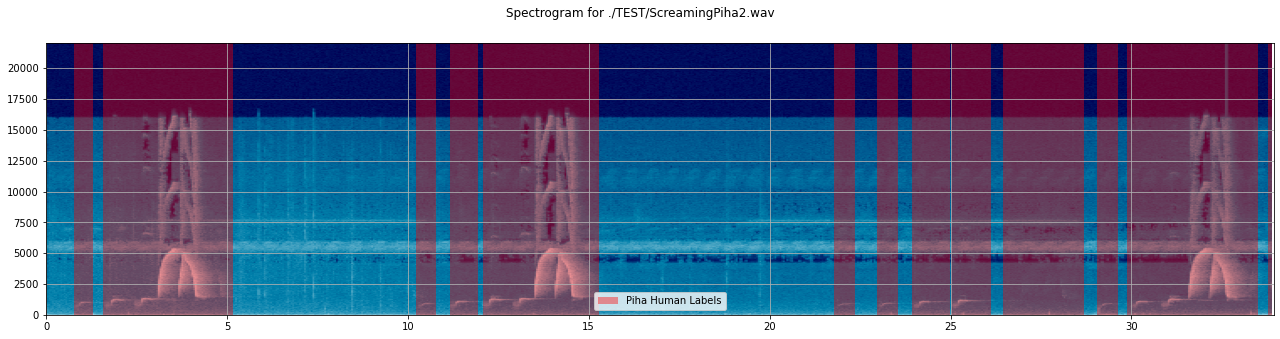

In [16]:
spectrogram_visualization(clip_path, premade_annotations_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"],premade_annotations_label = "Piha Human Labels")

### Graph with Both Automated and Human Labels 
    Orange ==> True Positive
    Red ==> False Negative
    Yellow ==> False Positive
    White ==> True Negative

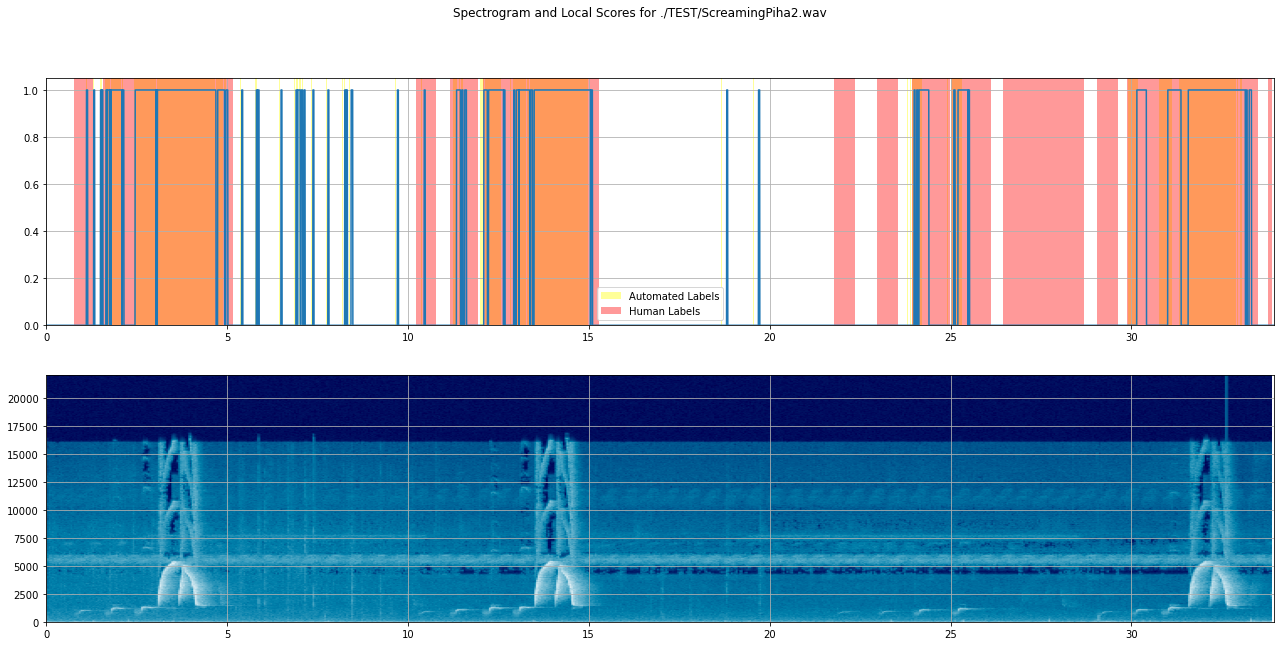

In [17]:
spectrogram_visualization(clip_path,build_automated_df = True,isolation_parameters=isolation_parameters,premade_annotations_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"])

### Another Visualization of True Positives, False Positives, False Negatives, and True Negatives 

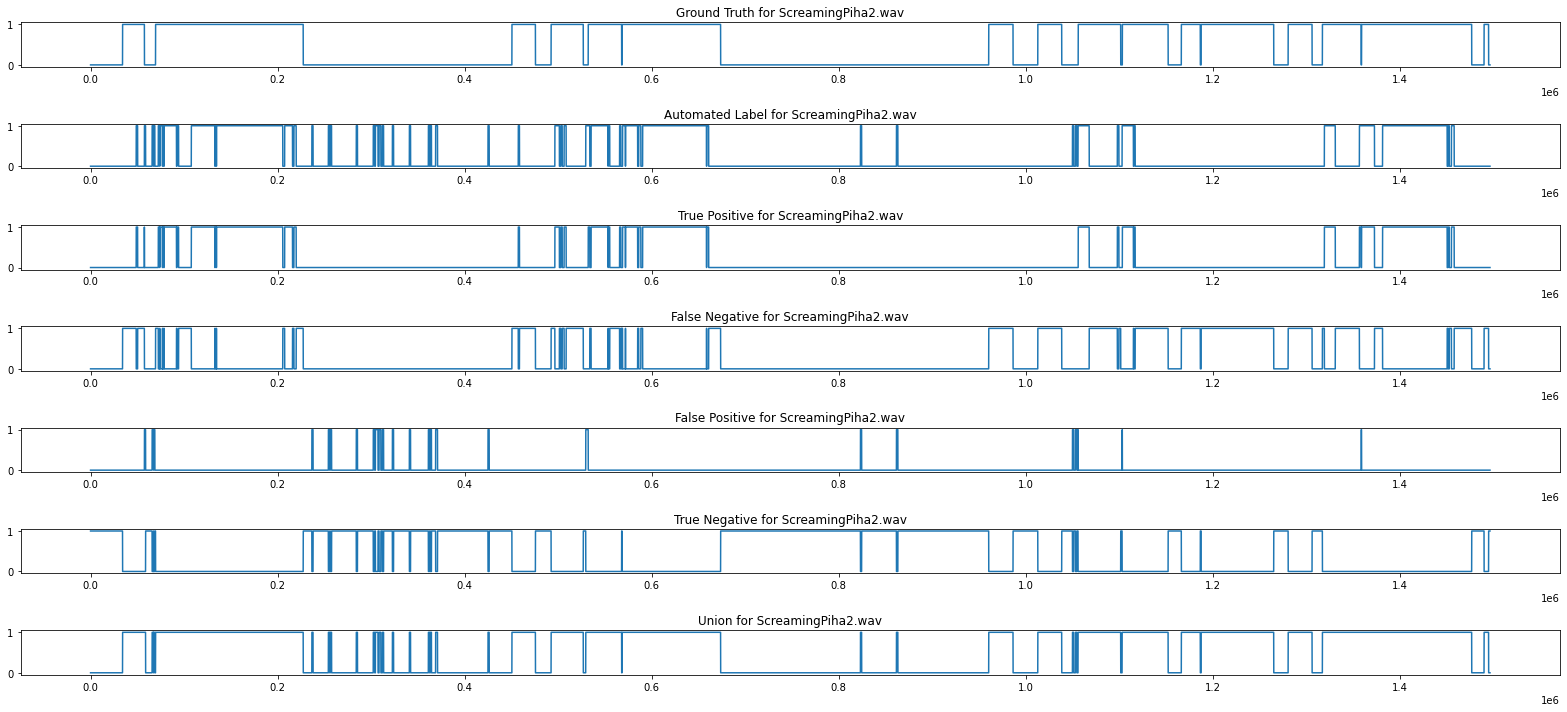

In [18]:
automated_piha_df = automated_df[automated_df["IN FILE"] == "ScreamingPiha2.wav"]
manual_piha_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"]
piha_stats = binary_visualization(automated_piha_df,manual_piha_df)

### Function that generates statistics to gauge efficacy of automated labeling compared to human labels 

In [19]:
statistics_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "general");
statistics_df

,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE POSITIVE,FALSE NEGATIVE,TRUE NEGATIVE,UNION,PRECISION,RECALL,F1,Global IoU
0,./TEST/,ScreamingPiha7.wav,bird,22.820748,17.465034,28.809456,64.494966,69.095238,0.566472,0.442004,0.496557,0.330280
1,./TEST/,ScreamingPiha2.wav,bird,8.588390,0.779660,9.903333,14.661678,19.271383,0.916775,0.464445,0.616544,0.445655
2,./TEST/,ScreamingPiha6.wav,bird,12.613265,3.732585,12.244989,42.044240,28.590839,0.771649,0.507408,0.612233,0.441165
3,./TEST/,ScreamingPiha1.wav,bird,8.092290,0.434853,21.128912,2.959955,29.656054,0.949004,0.276932,0.428749,0.272871
4,./TEST/,ScreamingPiha10.wav,bird,24.513832,8.503288,14.867460,41.898277,47.884580,0.742458,0.622474,0.677193,0.511936
5,./TEST/,ScreamingPiha4.wav,bird,2.317415,1.198844,3.084150,6.957143,6.600408,0.659057,0.429027,0.519727,0.351102
6,./TEST/,ScreamingPiha11.wav,bird,20.459637,6.253560,17.357732,19.824580,44.070930,0.765900,0.541012,0.634107,0.464243
7,./TEST/,ScreamingPiha8.wav,bird,3.110499,4.544059,3.789592,32.676667,11.444150,0.406359,0.450791,0.427423,0.271798
8,./TEST/,ScreamingPiha5.wav,bird,13.350181,0.873243,21.948458,18.006077,36.171882,0.938605,0.378207,0.539161,0.369076
9,./TEST/,ScreamingPiha9.wav,bird,15.024059,2.951769,13.568367,5.758662,31.544195,0.835792,0.525456,0.645249,0.476286


### Function that takes the statistical ouput of all of the clips and gets the equivalent global scores 

In [20]:
global_dataset_statistics(statistics_df)

,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.740073,0.472412,0.576699,0.405184


### Function that takes in the manual and automated labels for a clip and outputs human label-by-label IoU Scores. Used to derive statistics that measure how well a system is isolating desired segments of audio clips

In [21]:
Intersection_over_Union_Matrix = clip_IoU(automated_piha_df,manual_piha_df)
print(Intersection_over_Union_Matrix)

[[0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.0652 0.001  0.     ... 0.     0.     0.    ]
 ...
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.6272 0.0148 0.034 ]
 [0.     0.     0.     ... 0.     0.     0.    ]]


### Function that turns the IoU Matrix of a clip into true positive and false positives values, as well as computing the precision, recall, and F1 statistics

In [22]:
matrix_IoU_Scores(Intersection_over_Union_Matrix,manual_piha_df,0.5)

,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE NEGATIVE,FALSE POSITIVE,PRECISION,RECALL,F1
0,./TEST/,ScreamingPiha2.wav,bird,5,15,49,0.0926,0.25,0.1351


### Wrapper function that takes matrix_IoU_Scores across multiple clips. Allows user to modify the threshold that determines whether or not a label is a true positive.

In [23]:
stats_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "IoU",threshold = 0.5)
stats_df

Unable to allocate 17.8 GiB for an array with shape (405, 5891328) and data type float64
Something went wrong with 1 clips out of 11 clips


,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE NEGATIVE,FALSE POSITIVE,PRECISION,RECALL,F1
0,./TEST/,ScreamingPiha2.wav,bird,5,15,49,0.0926,0.2500,0.1351
1,./TEST/,ScreamingPiha6.wav,bird,2,17,108,0.0182,0.1053,0.0310
2,./TEST/,ScreamingPiha1.wav,bird,5,83,71,0.0658,0.0568,0.0610
3,./TEST/,ScreamingPiha10.wav,bird,13,27,101,0.1140,0.3250,0.1688
4,./TEST/,ScreamingPiha4.wav,bird,1,7,28,0.0345,0.1250,0.0541
5,./TEST/,ScreamingPiha11.wav,bird,5,30,122,0.0394,0.1429,0.0618
6,./TEST/,ScreamingPiha8.wav,bird,1,8,56,0.0175,0.1111,0.0302
7,./TEST/,ScreamingPiha5.wav,bird,2,28,86,0.0227,0.0667,0.0339
8,./TEST/,ScreamingPiha9.wav,bird,5,18,120,0.0400,0.2174,0.0676
9,./TEST/,ScreamingPiha3.wav,bird,1,5,11,0.0833,0.1667,0.1111


### Function that takes the output of dataset_IoU Statistics and ouputs a global count of true positives and false positives, as well as computing common metrics across the dataset

In [24]:
global_stats_df = global_statistics(stats_df)
global_stats_df

,MANUAL ID,TRUE POSITIVE,FALSE NEGATIVE,FALSE POSITIVE,PRECISION,RECALL,F1
0,N/A,40,238,752,0.0505,0.1439,0.0748
